# 1) Methodology and description
* In Supervised Learning, we devised the hypothesis (f) which describes perfectly the relationship between features and target class. 
* We are very likely to get a different hypothesis (f) if we use different training set. We define variance as the amount by which (f) varies when using different training sets. Additionally, we use different classifiers to estimate the true (f). As we simply our approach and makes assumptions to estimate (f), we give more bias to our hypothesis.
* Mathematically, we need low bias and low variance to minimise our model's error. A low-biased model fits training data very well but performs poor on test data. We want a low variance to avoid building a complex model. Hence we need to accept the trade-off between bias and variance.

### Learning Curve

* We take one single data pair from the training set and use it to estimate a model. Then we measure the model's error on the validation set and on that single training instance.
* We then repeat the process with more amount of training data until we use our entire training set. Initially, the error on the training instance will be 0, since it's easy to perfectly fit a single data instances. Consequently, the error on the validation set will be very large since the model is built around a single instance.
* As we increase the training set size, the model fits more perfectly the test data and fits training data less.
* We can plot the learning curve of training data and test data to better understand the nature of a model.

### Preparation steps

* We used pandas' read_csv method to read our dataset 'autoimmune.csv'. Columns are separated by commas and rows are separated by newlines. Each column describes one individual patient. Column Autoimmune_Disease is our target variable.

In [1]:
import pandas as pd

ds = pd.read_csv('data/autoimmune.txt', delimiter="\t",header=None)

* Apply transpose function to map attributes as columns and patient as rows

In [2]:
ds=ds.transpose()

* Assingning names to the columns as per the data set
* Re-numbering data set index from 1 (using numpy)

In [3]:
import numpy as np

ds.columns=['Age','Blood_Pressure','BMI','Plasma_level','Autoimmune_Disease','Adverse_events','Drug_in_serum','Liver_function','Activity_test','Secondary_test']
ds.index = np.arange(1, len(ds) + 1)

* Mapping data set into dependent attributes and class label attribute 

In [4]:
X = ds.drop('Autoimmune_Disease',axis=1)
y = ds['Autoimmune_Disease']

#### Assumptions 
* There are no outliers or missing data.
* Data presented is already scaled or don't required scaling.
    
#### Training set size
* The minimum data size is 1. Our training set has 376 instances, so the maximum value is 376.
* We kept aside 76 data for validation and plot curve with remaining 300 data.
* here, we use six sizes:
    * [1,50,150,200,250,300]
    * For each of the size above, a new model will be trained.

In [5]:
train_sizes=[1,50,150,200,250,300]

#### N-Cross Validation
* We will be using N Cross Validation to train our model for each training data size given above. In our case, N=10.

#### Function: learning_curve()
* We are using learning_curve() funtion from scikit-learn with following paramters.
    * estimator: our classifier to fit and train model
        * DecisionTreeClassifier(criterion='entropy',random_state = 100,
 max_depth=3)
        * GaussianNB
    * X: feature variables from the train data.
    * y: target variable from the train data.
    * cv: Cross Validation generator. In our case, we have used 10 fold Cross validation with (n_splits=10, shuffle=False, random_state=None)
    * train_sizes: size of training data set defined above.

#### Function: plot_learning_curve
* It takes mean of train scores and test scores per cross validation. It uses these values to construct a learning curve.
* Plot training set size on x-axis and error score on y-axis.

In [18]:
def plot_learning_curve(title,train_scores,test_scores):
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    #plot graph program code here

# 2) Plotting Graph
Learning curve for 6 training set sizes using 10-fold cross-validation.

## Decision Tree Classifier

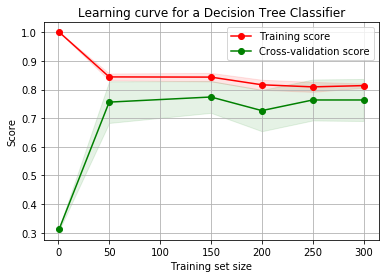

In [16]:
train_sizes, train_scores, test_scores = learning_curve(
 DecisionTreeClassifier(criterion='entropy',random_state = 100,
 max_depth=3), X,y,train_sizes = train_sizes, cv = 10)

plot_learning_curve("Learning curve for a Decision Tree Classifier",
                    train_scores,test_scores)

<img src="data/decision.png" style="width: 400px;float:left"/>

## Naive Bayes Classifier

In [1]:
train_sizes, train_scores, test_scores = learning_curve(
 GaussianNB(), X,y,train_sizes = train_sizes, cv = 10)

plot_learning_curve("Learning curve for a Naive Bayes Classifier",
                    train_scores,test_scores)


NameError: name 'learning_curve' is not defined

<img src="data/nb.png" style="width: 400px;float:left"/>

# 3) Observation

* (1) **[size=1]** When the training set size is 1, the training score is 1. This is normal behaviour since the model has no problem fitting perfectly a single data point. At this point, the validation score is 0. Since it's extremely unlikely that a model trained on a single data point can generalize 76 instances accurately to test data it hasn't seen in training.
<br><br>
* (2) **[size=50]** When the training set size increases to 50, the validation score rises sharply. Likewise, the training score decreases. The model performs much better now on the validation set because it is trained on more data (size=50) and so the estimation more correct now.

    As seen from the learning curve,
    * (Decision Tree Classifier)
       * Validation score increases from (0.31374269 to 0.75599415)
       * Training score decreases from (1 to 0.844)
    * (Naive Bayes Classifier)
       * Validation score increases from (0.31374269 to  0.73099415)
       * Training score decrease from (1 to 0.81)
<br><br>
* (3) **[size=150]** When the training set size increases to 150, the validation score increases slightly. The training score decreases with the small amount. The model has now become more efficient on the validation set because it is trained on more data (size=150). The model is estimating accurately with more training data.

    As seen from the learning curve,
    * (Decision Tree Classifier)
       * Validation score increases from (0.75599415 to 0.77383041)
       * Training score decreases from (0.844 to 0.84333333)
    * (Naive Bayes Classifier)
       * Validation score increases from (0.73099415 to 0.76023392)
       * Training score decreases from (0.81 to 0.78666667)
<br><br>
* (4) **[size=200]** 
<br>(Decision Tree Classifier)<br>
When the training set size increases to 200, both the validation score and training score have come down. But our model has acquired the task more efficiently and correctly.
   * Validation score increases from (0.77383041 to 0.72631579)
   * Training score decreases from (0.84333333 to 0.8165)
   
* (Naive Bayes Classifier)<br>
From 200 training data onwards, the validation and training score got almost near to each other. Consequently, the model performs much better now on the validation set because it's estimated with more data.
   * Validation score jumps from (0.76023392  0.75789474)
   * Training scores decrease from (0.78666667  0.777)
<br><br>
* (5) **[size=250]** 
<br>(Decision Tree Classifier)<br>
When the training set size increases to 250, the validation score and training score have come closer. The point tells us that both the score will remain same no matter how much training data we supplied.
   * Validation score increases from (0.72631579 to 0.76345029)
   * Training score decreases from (0.8165 to 0.8092)
   
* (Naive Bayes Classifier)<br>
From 250 training data onwards, the validation and training score stays roughly the same. We have an achieved an equilibrium between bias and variance.
   * Validation score increases from (0.75789474 to 0.75526316)
   * Training scores decrease from (0.777 to 0.7832)
<br><br>
* (6) **[size=300]** At 300 training data size for Naive Bayes, the validation and training scores converges to the same point. Adding more training data points won't lead to significantly better models. Switching to a different algorithm may produce different results and can adapt the data more perfectly. For Decision Tree Classifier, the validation score and training score could converge if more training instances are addded.
  
    As seen from the learning curve,
    * (Decision Tree Classifier)
       * Validation score increases from (0.76345029 to 0.76345029)
       * Training score decreases from (0.8092 to 0.81366667)
    * (Naive Bayes Classifier)
       * Validation score increases from (0.75526316  0.76315789)
       * Training scores decreases from (0.7832 to 0.78266667)

# 4) Conclusion
We can diagnose the above model using learning curve as follows:
* The gap between curves becomes more and more narrow as we increase the training data size. Generally, the more narrow the gap, the lower the variance.
* In our case, as we increased the training set sizes, the differences between the training and validation score narrowed down and so the gap between the two learning curves.
* High gap indicates high training score and also high variance. In our case, the training score converges to the state of no change at around 250. Hence, the learning corroborated that we have a low variance model.
* From the graph, we can deduce that training score has reduced with the increase in training set size. It means that our model has not fit well with the training data. This reflects a high bias model. But that is a trade-off that we have to weigh to get a low variance model.

# 5) References
* Scikit-learn documentation. http://scikit-learn.org Accessed 1 Nov, 2018 
* Pandas Library. http://pandas.pydata.org/pandas-docs/stable/ Accessed 1 Nov, 2018
* DataQuest: https://www.dataquest.io/blog/learning-curves-machine-learning/ Accessed 1 Nov, 2018
* Chapter 5, Page 137: Mitchell, Tom, 1997. Machine Learning. International ed. McGraw-Hill.
